In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression




In [68]:
df = pd.read_csv('avocado.csv')
df['color_category']

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking
...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard
246,21.6,17,36,19,black,47,182,240,firm-ripe
247,14.0,4,40,17,black,37,188,274,ripe
248,61.5,63,87,75,green,65,261,162,pre-conditioned


In [70]:
df.describe()

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3
count,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,50.618400,125.94400,64.356000,45.07200,58.016000,220.188000,208.644000
std,27.277678,117.13767,17.377144,19.11629,13.838126,34.405225,55.940564
min,10.300000,1.00000,30.000000,10.00000,30.000000,152.000000,100.000000
25%,25.750000,25.25000,51.250000,31.00000,47.250000,193.250000,155.250000
50%,48.950000,77.00000,65.000000,46.00000,60.000000,220.000000,218.000000
75%,74.050000,278.75000,76.750000,58.00000,68.000000,245.000000,260.500000
max,98.800000,329.00000,99.000000,78.00000,79.000000,299.000000,299.000000


In [71]:
df['ripeness'] = df['ripeness'].map({'hard': 1, 'pre-conditioned': 2, 'breaking': 3, 'firm-ripe':4, 'ripe': 5})

In [72]:
df.columns

Index(['firmness', 'hue', 'saturation', 'brightness', 'color_category',
       'sound_db', 'weight_g', 'size_cm3', 'ripeness'],
      dtype='object')

In [73]:
df = pd.get_dummies(df, columns=['color_category'], drop_first=True).astype(int)


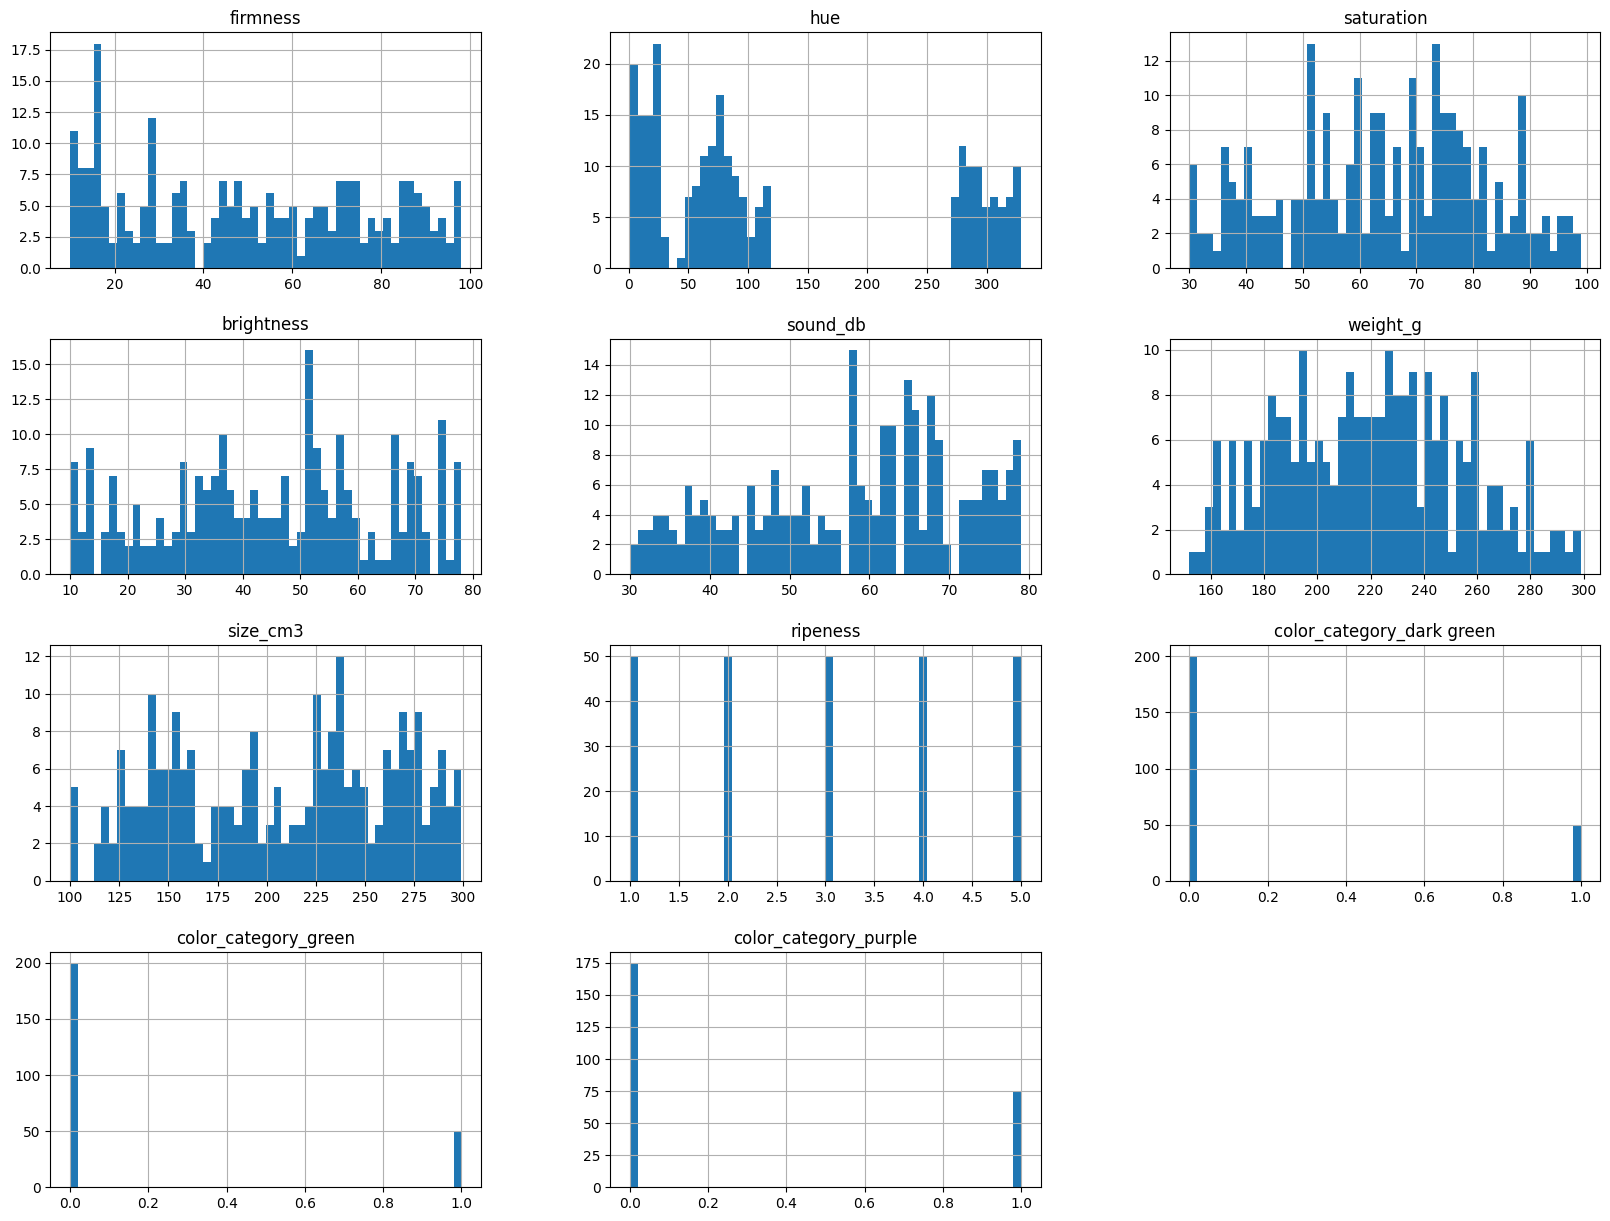

In [74]:
df.hist(bins=50, figsize=(20,15))
plt.show()


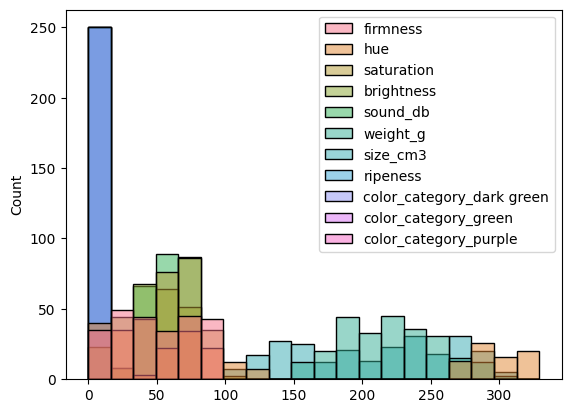

In [75]:
sns.histplot(data=df, bins=20)
plt.show()

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df.drop(columns=('ripeness'))
scaled_data = scaler.fit_transform(features)

In [77]:
scaled_data

array([[-1.32904775, -0.91480846, -1.4044229 , ..., -0.5       ,
        -0.5       , -0.65465367],
       [ 0.76573496, -0.62396945,  0.26778371, ..., -0.5       ,
         2.        , -0.65465367],
       [ 1.39049471, -0.56409082,  1.70934113, ...,  2.        ,
        -0.5       , -0.65465367],
       ...,
       [-1.32904775, -1.04311979, -1.4044229 , ..., -0.5       ,
        -0.5       , -0.65465367],
       [ 0.39822922, -0.53842856,  1.30570505, ..., -0.5       ,
         2.        , -0.65465367],
       [-1.21879603, -0.84637575, -1.98104587, ..., -0.5       ,
        -0.5       , -0.65465367]])

In [78]:
x = scaled_data
y = df['ripeness']

In [79]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [80]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [81]:
y_pred = log_model.predict(x_test)

In [82]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, log_loss, confusion_matrix
accuracy_score(y_test, y_pred)

1.0

In [55]:
import joblib
joblib.dump(log_model, 'modelw.pkl')
joblib.dump(scaler, 'scalerw.pkl')

['scalerw.pkl']

In [69]:
df['color']

10